In [13]:
# ===========================
# 1️⃣ Setup and Imports
# ===========================
# Install Qiskit, Aer, and visualization tools (if needed in an environment without them)
!pip install qiskit qiskit-aer numpy --quiet

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector # Corrected: 'prepare_state' removed
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display, Markdown

# Set up the simulator
simulator = AerSimulator()

def display_state(state, name):
    """Helper function to display statevector results."""
    display(Markdown(f"### Result for $|{name}\\rangle$:"))
    # Rounding for clean display
    state_display = np.round(state.data, 4)
    display(state)
    print(f"Statevector data (rounded): {state_display}\n")

In [14]:
# ==================================================
# 2️⃣ Predict statevector after H on |0>, |1>, |+>, |->
# ==================================================
display(Markdown("## 2. Hadamard on Key States"))

# 1. State |0>
state_0 = Statevector([1, 0])
qc_H0 = QuantumCircuit(1)
qc_H0.initialize(state_0, 0)
qc_H0.h(0)
result_H0 = Statevector(qc_H0)
display_state(result_H0, "0> after H (should be |+>)")

# 2. State |1>
state_1 = Statevector([0, 1])
qc_H1 = QuantumCircuit(1)
qc_H1.initialize(state_1, 0)
qc_H1.h(0)
result_H1 = Statevector(qc_H1)
display_state(result_H1, "1> after H (should be |->")

# 3. State |+> = 1/sqrt(2) * (|0> + |1>)
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
qc_Hplus = QuantumCircuit(1)
qc_Hplus.initialize(state_plus, 0)
qc_Hplus.h(0)
result_Hplus = Statevector(qc_Hplus)
display_state(result_Hplus, "+> after H (should be |0>)")

# 4. State |-> = 1/sqrt(2) * (|0> - |1>)
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])
qc_Hminus = QuantumCircuit(1)
qc_Hminus.initialize(state_minus, 0)
qc_Hminus.h(0)
result_Hminus = Statevector(qc_Hminus)
display_state(result_Hminus, "-> after H (should be |1>)")

## 2. Hadamard on Key States

### Result for $|0> after H (should be |+>)\rangle$:

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector data (rounded): [0.7071+0.j 0.7071+0.j]



### Result for $|1> after H (should be |->\rangle$:

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Statevector data (rounded): [ 0.7071+0.j -0.7071+0.j]



### Result for $|+> after H (should be |0>)\rangle$:

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector data (rounded): [1.+0.j 0.+0.j]



### Result for $|-> after H (should be |1>)\rangle$:

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Statevector data (rounded): [0.+0.j 1.+0.j]



<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1940959478.py:4: SyntaxWarning: invalid escape sequence '\o'
  display(Markdown("## 3. H $\otimes$ H $\otimes$ H on $|000\\rangle$ (Uniform Superposition)"))


## 3. H $\otimes$ H $\otimes$ H on $|000\rangle$ (Uniform Superposition)

Circuit Diagram:


┌───┐ ░ ┌─┐      
q_0: ┤ H ├─░─┤M├──────
     ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├─░──╫─┤M├───
     ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ║  ║ └╥┘
c: 3/═════════╩══╩══╩═
              0  1  2

### Measurement Probabilities (Histogram)

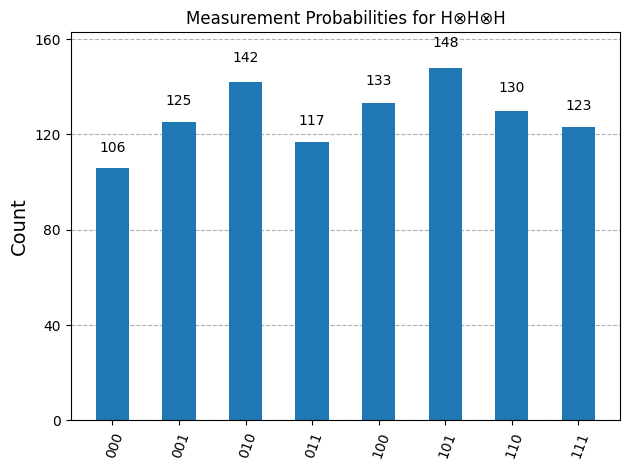

In [24]:
# ==========================================================
# 3️⃣ Create a 3-qubit system with H⊗H⊗H and analyze measurement
# ==========================================================
display(Markdown("## 3. H $\otimes$ H $\otimes$ H on $|000\\rangle$ (Uniform Superposition)"))

qc_superposition = QuantumCircuit(3, 3)

# Apply Hadamard to all three qubits (H⊗H⊗H)
qc_superposition.h([0, 1, 2])
qc_superposition.barrier()

# Add measurements
qc_superposition.measure([0, 1, 2], [0, 1, 2])

print("Circuit Diagram:")
# Use 'text' output as an alternative to 'mpl'
display(qc_superposition.draw('text'))

# Simulate and get counts
compiled_circuit = transpile(qc_superposition, simulator)
job = simulator.run(compiled_circuit, shots=1024)
counts = job.result().get_counts(qc_superposition)

display(Markdown("### Measurement Probabilities (Histogram)"))
plot_histogram(counts, title="Measurement Probabilities for H⊗H⊗H")

In [27]:
%pip install pylatexenc --quiet

## 4. Entangled GHZ State: H + CX + CX

Circuit Diagram:


┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

### Measurement Probabilities (Histogram)

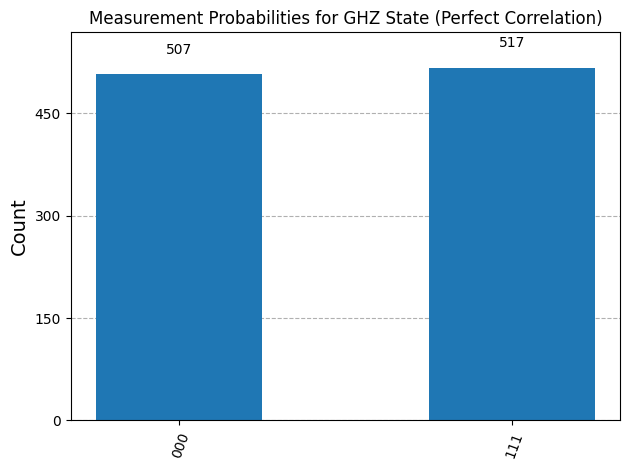

In [29]:
# =============================================================
# 4️⃣ Apply H + CX + CX on 3 qubits and analyze correlations (GHZ State)
# =============================================================
display(Markdown("## 4. Entangled GHZ State: H + CX + CX"))

qc_ghz = QuantumCircuit(3, 3)

# 1. Apply H to Qubit 0 (creates initial superposition)
qc_ghz.h(0)

# 2. Apply CX(Control: Q0, Target: Q1)
qc_ghz.cx(0, 1)

# 3. Apply CX(Control: Q0, Target: Q2)
qc_ghz.cx(0, 2)
qc_ghz.barrier()

# Add measurements
qc_ghz.measure([0, 1, 2], [0, 1, 2])

print("Circuit Diagram:")
# Use 'text' output as an alternative to 'mpl'
display(qc_ghz.draw('text'))

# Simulate and get counts
compiled_circuit = transpile(qc_ghz, simulator)
job = simulator.run(compiled_circuit, shots=1024)
counts = job.result().get_counts(qc_ghz)

display(Markdown("### Measurement Probabilities (Histogram)"))
plot_histogram(counts, title="Measurement Probabilities for GHZ State (Perfect Correlation)")

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2433457028.py:4: SyntaxWarning: invalid escape sequence '\c'
  display(Markdown("## 5. Double Hadamard Verification: $H \cdot H = I$"))


## 5. Double Hadamard Verification: $H \cdot H = I$

Circuit Diagram:


┌───┐┌───┐┌───┐ ░ ┌─┐
  q: ┤ X ├┤ H ├┤ H ├─░─┤M├
     └───┘└───┘└───┘ ░ └╥┘
c: 1/═══════════════════╩═
                        0

### Measurement Result

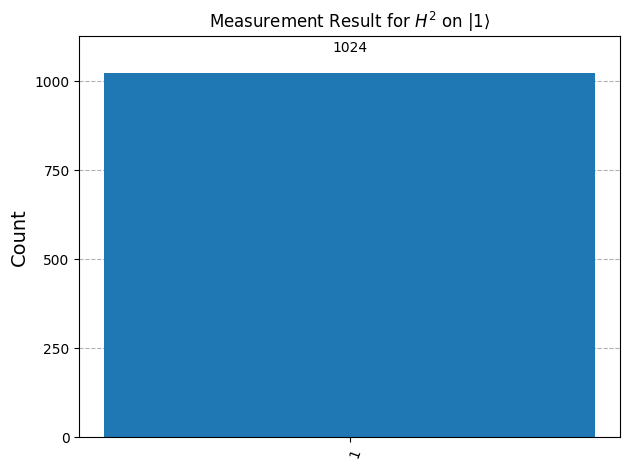

In [31]:
# ========================================================
# 5️⃣ Apply H twice on |1> and verify the original state
# ========================================================
display(Markdown("## 5. Double Hadamard Verification: $H \cdot H = I$"))

qc_double_h = QuantumCircuit(1, 1)

# 1. Initialize to |1> using X gate (start state)
qc_double_h.x(0)

# 2. Apply H twice (H^2)
qc_double_h.h(0)
qc_double_h.h(0)
qc_double_h.barrier()

# Measure
qc_double_h.measure(0, 0)

print("Circuit Diagram:")
# Use 'text' output as an alternative to 'mpl'
display(qc_double_h.draw('text'))

# Simulate and get counts
compiled_circuit = transpile(qc_double_h, simulator)
job = simulator.run(compiled_circuit, shots=1024)
counts = job.result().get_counts(qc_double_h)

display(Markdown("### Measurement Result"))
# Explicitly display the plot object returned by plot_histogram
histogram_figure = plot_histogram(counts, title="Measurement Result for $H^2$ on $|1\\rangle$")
display(histogram_figure)

## 6. Bloch Sphere Visualization of Hadamard Rotation

Initial State |0>:


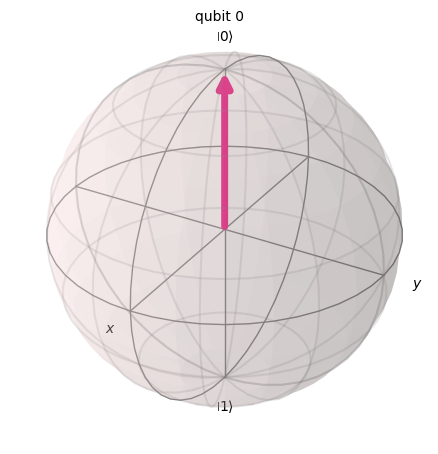

State after H (|0> -> |+>):


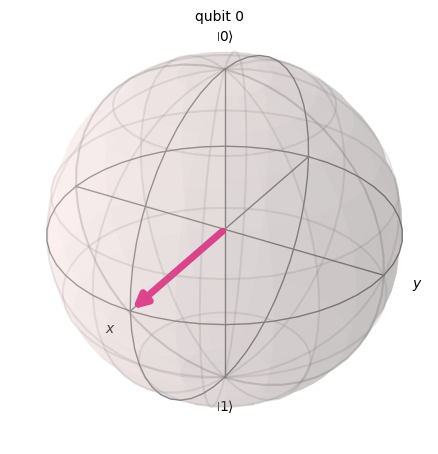

Initial State |+>:


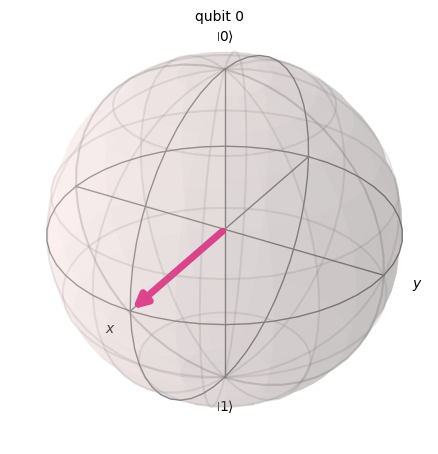

State after H (|+> -> |0>):


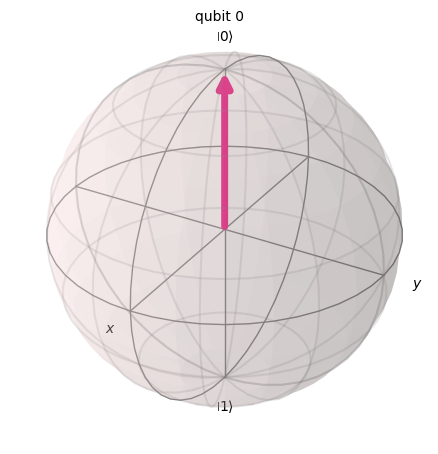

In [32]:
# ========================================================
# 6️⃣ Use Bloch sphere plots to observe qubit rotations
# ========================================================
display(Markdown("## 6. Bloch Sphere Visualization of Hadamard Rotation"))

# --- Rotation 1: |0> to |+> (Z-axis to X-axis) ---
qc_z_to_x = QuantumCircuit(1)
# Statevector starts at |0> (North Pole / +Z)
state_z = Statevector(qc_z_to_x)
print("Initial State |0>:")
display(plot_bloch_multivector(state_z))

qc_z_to_x.h(0) # Apply H
state_x = Statevector(qc_z_to_x)
print("State after H (|0> -> |+>):")
# State is now |+> (on the +X axis)
display(plot_bloch_multivector(state_x))

# --- Rotation 2: |+> to |0> (X-axis to Z-axis) ---
qc_x_to_z = QuantumCircuit(1)
qc_x_to_z.h(0) # Prepare |+>
# Statevector starts at |+> (+X axis)
state_x_start = Statevector(qc_x_to_z)
print("Initial State |+>:")
display(plot_bloch_multivector(state_x_start))

qc_x_to_z.h(0) # Apply H again
state_z_end = Statevector(qc_x_to_z)
print("State after H (|+> -> |0>):")
# State is now |0> (North Pole / +Z)
display(plot_bloch_multivector(state_z_end))